Przed oddaniem zadania upewnij się, że wszystko działa poprawnie.
**Uruchom ponownie kernel** (z paska menu: Kernel$\rightarrow$Restart) a następnie
**wykonaj wszystkie komórki** (z paska menu: Cell$\rightarrow$Run All).

Upewnij się, że wypełniłeś wszystkie pola `TU WPISZ KOD` lub `TU WPISZ ODPOWIEDŹ`, oraz
że podałeś swoje imię i nazwisko poniżej:

In [1]:
NAME = "Weronika Pawlak"

---

In [2]:
import pickle

import numpy as np
from scipy.stats import boxcox
import pandas as pd
import seaborn as sns
from matplotlib import pyplot as plt
from sklearn.model_selection import train_test_split

In [3]:
import sys
sys.path.append('./')

from src.visualization import (
    plot_data,
)

# Zbiór danych: [Fish market](https://www.kaggle.com/aungpyaeap/fish-market)

In [4]:
!head -5 data/fish.csv

'head' is not recognized as an internal or external command,
operable program or batch file.


In [5]:
data = pd.read_csv('data/fish.csv')

## Eksploracyjna Analiza Danych

Ten fragment zeszytu został zainspirowany [następującym zeszytem](https://www.kaggle.com/zosimovaa/linear-regression-prediction-of-fish-weight).

In [6]:
data.shape

(159, 7)

### Cechy
Zmienne niezależne:
- Species - gatunek ryby (ciąg znaków alfanumerycznych)
- Length1 - długość standardowa w centymetrach (liczba rzeczywista)
- Length2 - długość ogonowa w centymetrach (liczba rzeczywista)
- Length3 - długość całkowita w centymetrach (liczba rzeczywista)
- Height - wysokość ciała ryby w centymetrach (liczba rzeczywista)
- Width - szerokość ciała ryby w centymetrach (liczba rzeczywista)

Zmienna zależna:
- Weight - waga ryby w gramach (liczba rzeczywista)

In [7]:
data.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width
count,159,159.000000,159.000000,159.000000,159.000000,159.000000,159.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,56,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,398.326415,26.247170,28.415723,31.227044,8.970994,4.417486
std,NaN,357.978317,9.996441,10.716328,11.610246,4.286208,1.685804
min,NaN,0.000000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,NaN,120.000000,19.050000,21.000000,23.150000,5.944800,3.385650
50%,NaN,273.000000,25.200000,27.300000,29.400000,7.786000,4.248500
75%,NaN,650.000000,32.700000,35.500000,39.650000,12.365900,5.584500


Widzimy, że minimalna wartość w kolumnie `Weight` to 0. Sprawdźmy dla jakich (zwłaszcza ilu) rekordów taka sytuacja występuje.

In [8]:
data[data['Weight'] == 0]

,Species,Weight,Length1,Length2,Length3,Height,Width
40,Roach,0.0,19.0,20.5,22.8,6.4752,3.3516


Jest to jeden rekord, który bez konsekwencji możemy odrzucić ze względu na nierzeczywistą wartość jednej ze zmiennych.

In [9]:
data = data[data['Weight'] != 0]

Należy wiedzieć, że wiersz `freq` to liczność najpopularniejszej wartości w kolumnie kategorycznej. Poniżej liczności dla wszystkich klas:

In [10]:
data['Species'].value_counts()

Perch        56
Bream        35
Roach        19
Pike         17
Smelt        14
Parkki       11
Whitefish     6
Name: Species, dtype: int64

### Podział zbioru danych
Zasymulumemy teraz rzeczywiste warunki pracy ze zbiorem danych. Na początek podzielimy zbiór na część treningową oraz testową. Następnie na podstawie zbioru treningowego zdecydujemy jakie transformacje zostaną dokonane i zaaplikujemy je. Na koniec te same operacje zostaną użyte na zbiorze testowym.

In [11]:
train_data, test_data = train_test_split(
    data,
    test_size=0.3,
    stratify=data['Species'],
    random_state=2021,
)

In [12]:
train_data.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width
count,110,110.000000,110.000000,110.000000,110.000000,110.000000,110.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,39,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,400.806364,26.238182,28.386364,31.182727,8.916010,4.421358
std,NaN,354.122331,10.156066,10.876694,11.728495,4.157302,1.697451
min,NaN,5.900000,7.500000,8.400000,8.800000,1.728400,1.047600
25%,NaN,122.500000,19.000000,20.775000,22.575000,6.111150,3.322450
50%,NaN,300.000000,25.400000,27.500000,29.750000,7.806200,4.328750
75%,NaN,607.500000,32.000000,35.000000,39.175000,12.371850,5.577375


In [13]:
test_data.describe(include='all')

,Species,Weight,Length1,Length2,Length3,Height,Width
count,48,48.000000,48.000000,48.000000,48.000000,48.000000,48.000000
unique,7,NaN,NaN,NaN,NaN,NaN,NaN
top,Perch,NaN,NaN,NaN,NaN,NaN,NaN
freq,17,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,400.941667,26.418750,28.647917,31.504167,9.148994,4.430817
std,NaN,369.557071,9.776147,10.502644,11.512583,4.637411,1.687333
min,NaN,9.800000,10.700000,11.200000,12.400000,2.083200,1.255800
25%,NaN,123.750000,19.950000,21.875000,23.500000,5.870250,3.409675
50%,NaN,246.000000,24.300000,26.500000,29.450000,7.286400,4.092900
75%,NaN,685.000000,34.125000,36.625000,39.975000,11.949025,5.654625


### Zależność `Weight` od wszystkich zmiennych (rzeczywistych)

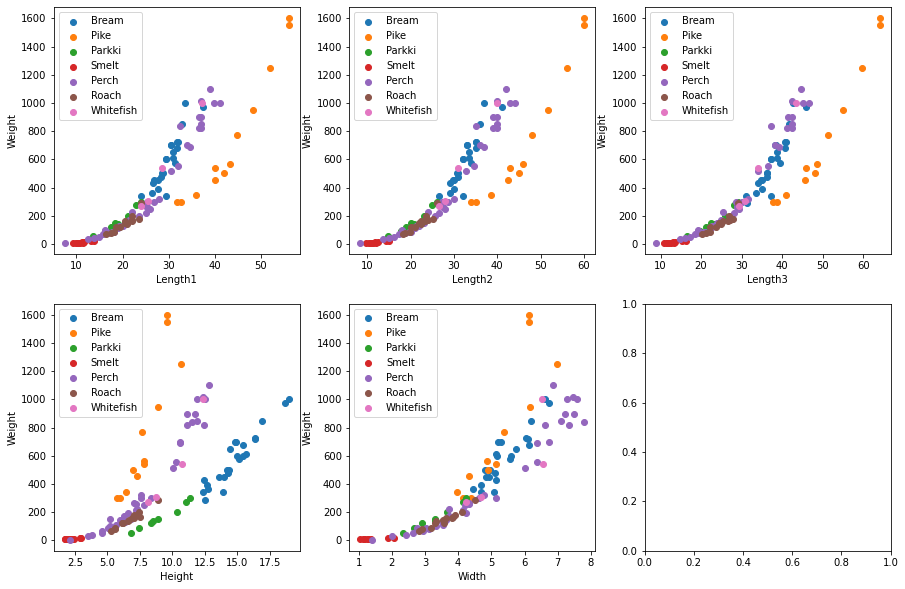

In [14]:
properties = {
    'y': "Weight",
    'category': "Species",
}

plot_data(train_data, properties)

Na powyższych wykresach widać, że zależność zmiennej niezależnej od trzech zmiennych `Length` jest bardzo podobna. Możemy mieć zatem sytuację, gdy macierz $X$ nie ma pełnego rzędu kolumnowego.

Aby zewaluować hipotezę możemy wyświetlić zależności pomiędzy wszystkimi parami zmiennych w zbiorze oraz policzyć współczynnik korelacji pomiędzy zmiennymi.

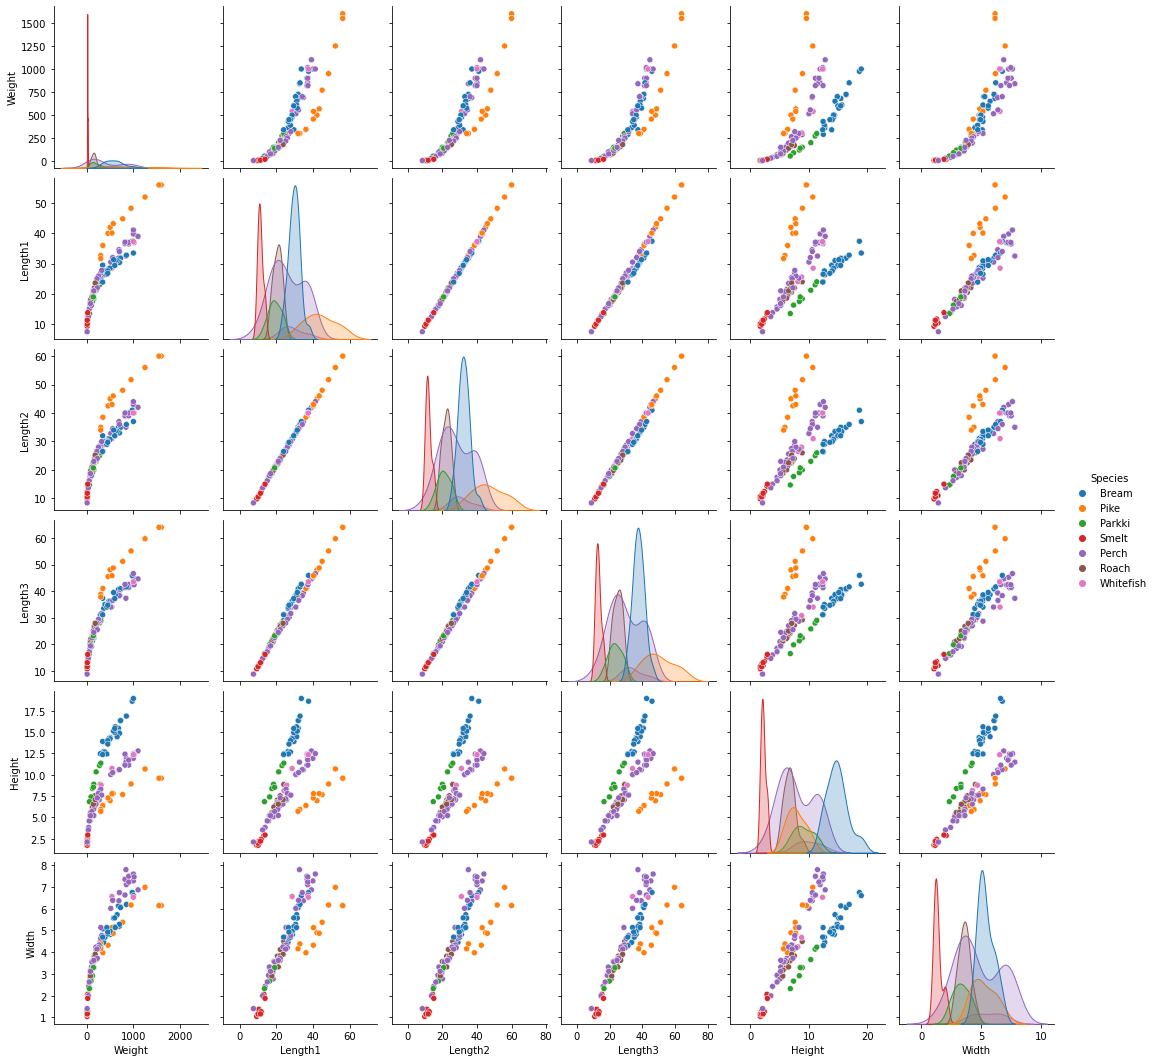

In [15]:
sns.pairplot(train_data, hue='Species')

In [16]:
corr = train_data.corr()
corr

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.914424,0.916998,0.918364,0.695454,0.878632
Length1,0.914424,1.000000,0.999545,0.991897,0.605937,0.857863
Length2,0.916998,0.999545,1.000000,0.993883,0.620641,0.864198
Length3,0.918364,0.991897,0.993883,1.000000,0.684703,0.869302
Height,0.695454,0.605937,0.620641,0.684703,1.000000,0.792610
Width,0.878632,0.857863,0.864198,0.869302,0.792610,1.000000


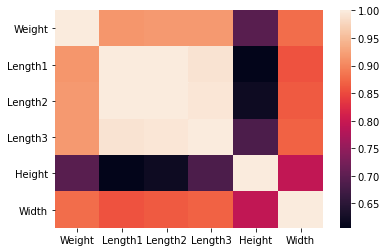

In [17]:
sns.heatmap(
    corr, 
    xticklabels=corr.columns,
    yticklabels=corr.columns
)

Widzimy wyraźnie, że wszystkie trzy zmienne `Length` są ze sobą parami skorelowane liniowo. Zgodnie z tym co przedstawione jest w zeszycie `01_LinearRegression`, takie zależności nie będą korzystne dla esymacji parametrów. Pozostaje zatem wyeliminować dwie z trzech zmiennych.

Wiemy, że `Length1` oznacza długość ciała ryby bez ogona, intuicyjnie jest więc najlepszym predyktorem masy ciała ryby (płetwa ogonowa jest lekka). Z drugiej strony widzimy, że największą korelację ze zmienną zależną ma `Length3`, czyli całkowita długość ryby z ogonem. Obserwujemy jednak wynik pomiaru współczynnika korelacji liniowej, a zależność pomiędzy zmiennymi nie jest liniowa (tą kwestię poruszymy w dalszej części analizy). Należy zatem zbadać jeden z nieparametrycznych współczynników korelacji, na przykład **współczynnik korelacji rang Spearmana**.

In [18]:
train_data.corr('spearman')

,Weight,Length1,Length2,Length3,Height,Width
Weight,1.000000,0.960331,0.963099,0.965219,0.842732,0.975332
Length1,0.960331,1.000000,0.999382,0.993492,0.720063,0.926253
Length2,0.963099,0.999382,1.000000,0.994783,0.726016,0.928427
Length3,0.965219,0.993492,0.994783,1.000000,0.758292,0.921016
Height,0.842732,0.720063,0.726016,0.758292,1.000000,0.829895
Width,0.975332,0.926253,0.928427,0.921016,0.829895,1.000000


Ponownie zmienna `Length3` wykazuje największą korelację z `Weight`, dlatego to ją pozostawimy w zbiorze.

In [19]:
train_data = train_data.drop(['Length1', 'Length2'], axis=1)

Kolejnym aspektem zwracającym uwagę na powyższych wykresach był charakter zależności zmiennej niezależnej (`Weight`) od pozostałych zmiennych rzeczywistych. Nie jest ona liniowa, jednak zdecydowanie można zaobserwować monotoniczny trend. Zatem podstawowe założenie na temat modelu regresji liniowej jest naruszone. Nie oznacza to jednak, że musimy sięgnąć po bardziej zaawansowany model.

Przy stosowaniu modeli liniowych bardzo częstym zabiegiem na etapie przygotowania zbioru danych jest aplikacja **monotonicznych transformacji**. Dlaczego monotonicznych? Najłatwiej wyobrazić to sobie na przykładzie klasyfikacji. Dla naszego zbioru danych posiadamy pewien nieliniowy model wyznaczający granicę decyzyjną (ang. *decision boundary*). Chcemy jednak mieć liniowy model o tej samej granicy. Stosując transformację monotoniczną nie przesuwamy granicy, a jedynie zmieniamy kształt przestrzeni, na której leży. Oczywiście w sytuacji gdy oryginalna zależność w danych nie jest monotoniczna, to by otrzymać zależność liniową (która jest monotoniczna), to musimy zastosować transformację niemonotoniczną.

Transformacja może być zastosowana dla zmiennych niezależnych, bądź dla zmiennej zależnej. W naszej sytuacji widzimy, że zależność `Weight` od wszystkich zmiennych jest nieliniowa, więc obiecującym jest dokonać jednej transformacji zmiennej zależnej, która przywróci założenie o liniowości problemu.

Transformacjami *pierwszego wyboru* są najczęściej funkcja logarytmu naturalnego (z podstawą $e$) oraz funkcja wykładnicza, stosowane zależnie od tego, czy zależność rośnie szybciej, czy wolniej od $f'(x)=1$.

W tym zbiorze mamy do czynienia ze zbyt szybkim wzrostem, zatem stosujemy logarytm.

In [20]:
train_data_tmp = train_data.copy()
train_data_tmp['Weight'] = np.log(train_data_tmp['Weight'])

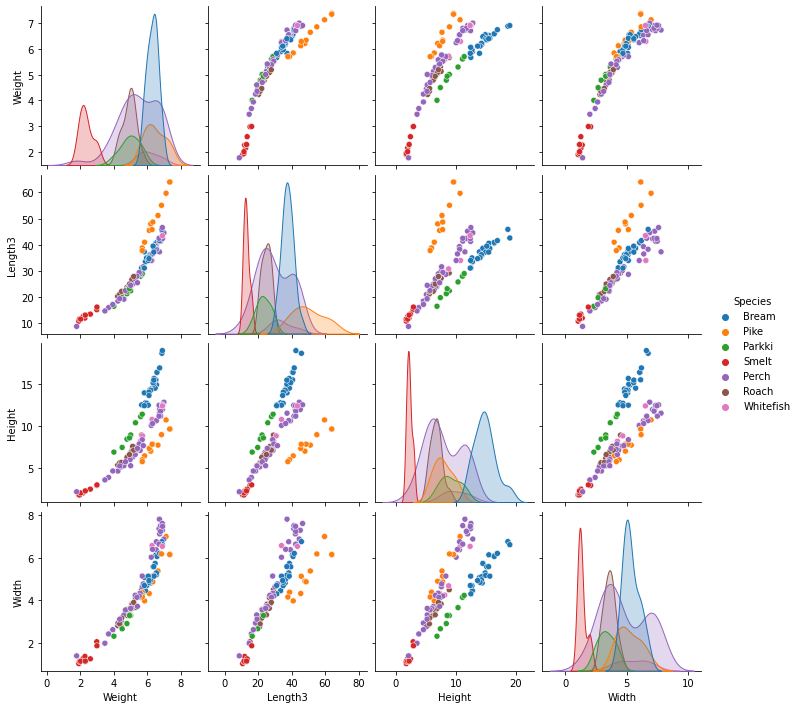

In [21]:
sns.pairplot(train_data_tmp, hue='Species')

Taka transformacja zaprowadziła nas na drugi kraniec spektrum - zależność jest "wolniejsza" od liniowej.

W takich sytuacjach najlepiej posłużyć się sprawdzoną techniką, którą w tym przypadku będzie **Box-Cox tranformation**, której nazwa pochodzi od dwóch autorów publikacji, w której ją przedstawili i dogłębnie przeanalizowali. Ta publikacja to
*Box, G. E. P., & Cox, D. R. (1964). An Analysis of Transformations. In Journal of the Royal Statistical Society. Series B (Methodological) (Vol. 26, Issue 2). https://www.jstor.org/stable/2984418?seq=1*.

Panowie G. E. P. Box oraz D. R. Cox są odpowiedzialni za bardzo wiele istotnych odkryć w dziedzinie statystyki, prawdopobieństwa, symulacji itp.

Transformacja Box-Cox (jednoparametrowa) jest przedstawicielem rodziny **power tranformations** i ma następującą postać:

$$ y^{(\lambda)} = \begin{cases}
\frac{y^{\lambda} - 1}{\lambda} & \text{if } \lambda \neq 0,\\
\ln{y} & \text{if } \lambda = 0.
\end{cases}$$

Oczywistym pytaniem staje się **"Jak dobrać $\lambda$?"**. Panowie Box i Cox dają na to odpowiedź. Oto streszczenie do wyżej wspomnianej publikacji:

> In the analysis of data it is often assumed that observations $y_1, y_2, \ldots, y_N$ are independently normally distributed with constant variance and with expectations specified by a model linear in a set of parameters 0. In this paper we make the less restrictive assumption that such a normal, homoscedastic, linear model is appropriate after some suitable transformation has been applied to the y's. Inferences about the transformation and about the parameters of the linear model are made by computing the likelihood function and the relevant posterior distribution. The contributions of normality, homoscedasticity and additivity to the transformation are separated. The relation of the present methods to earlier procedures for finding transformations is discussed. The methods are illustrated with examples

Metoda polega na założeniu, że **dla pewnej wartości $\lambda$ założenia modelu są spełnione** (z dodatkowym założeniem o normalności błędu), można zatem sformułować likelihood modelu względem $\pmb{\theta}X$, $Y$ oraz $\lambda$. Następnie obrać można dwa podejścia (jak zwykle):
* MLE - punktowe estymaty dla $\pmb{\beta}$ oraz $\sigma^2$ i testy statystyczne + przedziały ufności dla $\lambda$
   Likelihood modelu transformacją Box-Cox ma postać likelihoodu dla rezyduów (zakładamy normalność) przeskalowanego przez **Jakobian transformacji** - jest to własność gęstości prawdopobieństwa transformowanej zmiennej losowej, na której opiera się model **Normalizing Flows** (przedstawiony w dalszej części kursu). Mamy zatem
   $$ L(\lambda, \pmb{\beta}, \sigma^2) = \frac{1}{(2 \pi)^{N/2} \sigma^N} \exp \left\{-\frac{(Y^{(\lambda)} - X \pmb{\beta})^\intercal (Y^{(\lambda)} - X \pmb{\beta})}{2 \sigma^2} \right\} J(\lambda ; Y),$$
   gdzie
   $$ J(\lambda ; Y) = \prod_{i=1}^N \left| \frac{\mathrm{d}y_i^{(\lambda)}}{\mathrm{d}y_i} \right |. $$
   Zatem estymując $\hat{\pmb{\beta}}(\lambda)$ oraz $\hat{\sigma}^2(\lambda) = Y^{(\lambda)\intercal} M(\lambda) Y^{(\lambda)}/N$ (obciążony estymator MLE) i przechodząc na log-likelihood (z dokładnością do stałej) mamy
   $$ LL_{\max}(\lambda) \sim - \frac{1}{2} N \log \hat{\sigma}^2(\lambda) + \log J(\lambda ; Y),$$
   gdzie dla obranej transformacji
   $$ \log J(\lambda ; Y) = (\lambda - 1)\sum_{i=1}^N \log y_i $$
* MAP - jednostajny prior na "rozsądnym przedziale" dla $\pmb{\beta}$ oraz $\sigma^2$ i rozkład posterior dla $\lambda$

Chcąc dobrać $\lambda$ stajemy przed problemem - żadna z bibliotek w Python nie implementuje estymacji w prawidłowy sposób. Istnieją dwie implementacje tej metody - `scipy.stats.boxcox` oraz `sklearn.preprocessing.PowerTransformer` - obie jednak są obarczone tym samym błędem. Sprowadzają problem do transformowania $Y$ do rozkładu normalnego, a nie rezyduów. Prawidłowa implementacja jest dostępna na przykład w pakiecie R.

Jesteśmy zatem zmuszeni samodzielnie zaimplementować metodę. Będzie ona wyglądać następująco:
1. Wybór zakresu dla $\lambda$ i podział na równomierne odcinki.
2. Obliczenie $LL_{\max}(\lambda)$ dla każdej z wartości $\lambda$ z punktu 1.
3. Wybór $\hat{\lambda}$ o największym log-likelihoodzie.

Dodajmy do macierzy $X$ wektor $\pmb{1}$, który będzie odpowiadał za wyraz wolny.

In [22]:
train_data['intercept'] = 1

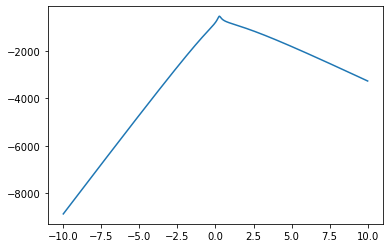

0.25025025025025016


In [23]:
def anihilator_matrix(x):
    n = x.shape[0]
    return np.eye(n) - np.matmul(x, np.matmul(np.linalg.inv(np.matmul(np.transpose(x), x)), np.transpose(x)))

def log_likelihood_lambda(lmbda, anihilator, y):
    n = y.shape[0]
    y_lambda = boxcox(y, lmbda=lmbda)
    return (
        (- n/2 * np.log(np.matmul(np.matmul(np.transpose(y_lambda), anihilator), y_lambda) / n)) +
        ((lmbda - 1) * np.sum(np.log(y)))
    )

def find_box_cox_lambda(y, x, lmbda_min=-10, lmbda_max=10):
    anihilator = anihilator_matrix(x)
    lmbda_linspace = np.linspace(start=lmbda_min, stop=lmbda_max, num=1000, endpoint=True,)
    ll = []
    for lmbda in lmbda_linspace:
        ll.append(log_likelihood_lambda(
            lmbda,
            anihilator,
            y
        ))
    plt.plot(lmbda_linspace, ll)
    plt.show()
    return lmbda_linspace[np.argmax(ll)]

lmbda = find_box_cox_lambda(
    data['Weight'].to_numpy(),
    data.drop(labels=['Weight', 'Species',], axis=1).to_numpy(),
)

print(lmbda)

In [24]:
train_data_tmp = train_data.copy()
train_data_tmp['Weight'] = boxcox(train_data_tmp['Weight'], lmbda=lmbda)

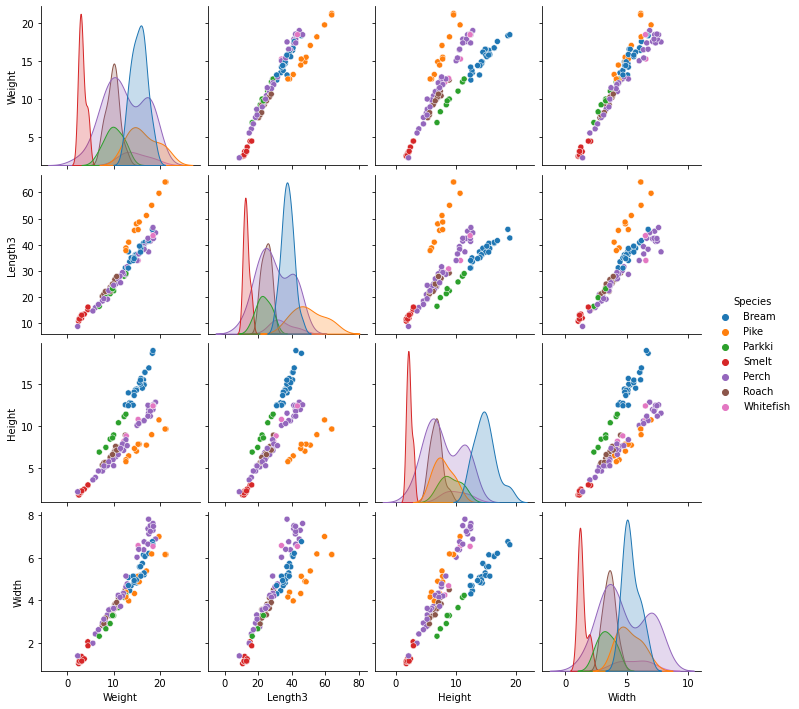

In [25]:
sns.pairplot(train_data_tmp.drop(labels=['intercept'], axis=1), hue='Species')

Powyższe wykresy potwierdzają, że dzięki transformacji Box-Cox zmienna zależna stała się liniowo zależna od zmiennych niezależnych.

In [26]:
train_data = train_data_tmp

test_data = test_data.drop(['Length1', 'Length2'], axis=1)
test_data['intercept'] = 1
test_data['Weight'] = boxcox(test_data['Weight'], lmbda=lmbda)

In [27]:
with open('./data/fish-preprocessed.pkl', 'wb') as f:
    pickle.dump(
        {
            'train': train_data,
            'test': test_data,
        },
        f
    )